S* (эталон) = 5.1677096384588870

Вар          pi(ввод)               S_обр        Δ_обр        δ_обр              S_прям       Δ_прям       δ_прям
________________________________________________________________________________________________________________________
  1                 3      4.934799200546  2.32910e-01  4.50703e-02      4.934799200546  2.32910e-01  4.50703e-02
  2              3.14      5.165089829905  2.61981e-03  5.06957e-04      5.165089829905  2.61981e-03  5.06957e-04
  3            3.1415      5.167557229505  1.52409e-04  2.94926e-05      5.167557229505  1.52409e-04  2.94926e-05
  4          3.141592      5.167708563347  1.07511e-06  2.08044e-07      5.167708563347  1.07511e-06  2.08044e-07
  5        3.14159265      5.167709632554  5.90497e-09  1.14267e-09      5.167709632554  5.90515e-09  1.14270e-09
  6      3.1415926535      5.167709638311  1.47703e-10  2.85819e-11      5.167709638311  1.47867e-10  2.86136e-11
  7    3.141592653589      5.167709638458  1.30

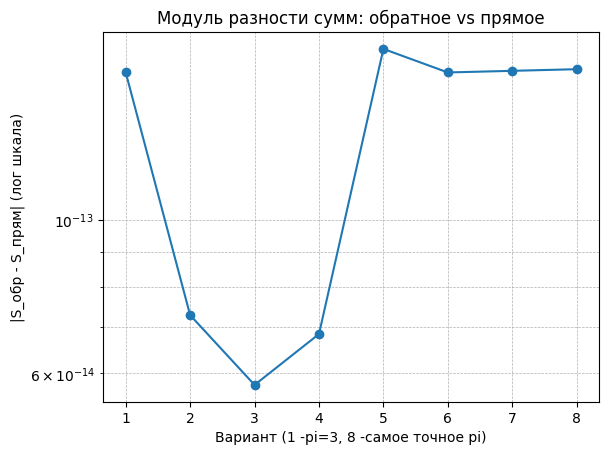

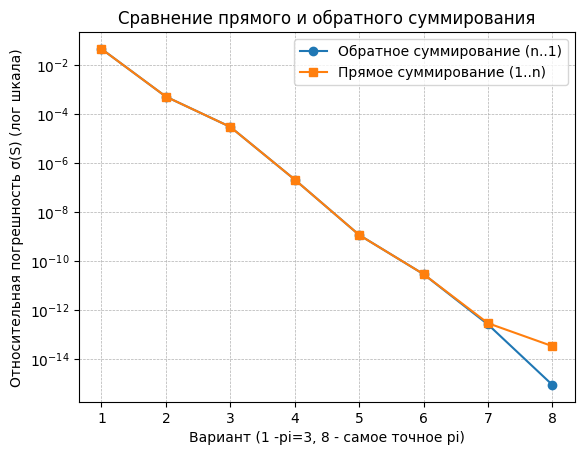

In [12]:
import math
import matplotlib.pyplot as plt

N = 1_000_000

PI_VARIANTS = [
    "3",
    "3.14",
    "3.1415",
    "3.141592",
    "3.14159265",
    "3.1415926535",
    "3.141592653589",
    "3.14159265358979",
]

def harmonic_2_fsum(n: int) -> float:
    return math.fsum(1.0 / (k * k) for k in range(1, n + 1))

def sum_reverse(pi_value: float, n: int) -> float: #обратное суммирование
    s = 0.0
    for k in range(n, 0, -1):
        s += pi_value / (k * k)
    return s

def sum_forward(pi_value: float, n: int) -> float: #прямое суммирование
    s = 0.0
    for k in range(1, n + 1):
        s += pi_value / (k * k)
    return s

def main():
    H2 = harmonic_2_fsum(N)
    S_true = math.pi * H2

    rows = []

    print(f"S* (эталон) = {S_true:.16f}\n")
    print(
        f"{'Вар':>3}  {'pi(ввод)':>16}  "
        f"{'S_обр':>18} {'Δ_обр':>12} {'δ_обр':>12}  "
        f"{'S_прям':>18} {'Δ_прям':>12} {'δ_прям':>12}"
    )
    print("_" * 120)

    for i, p_str in enumerate(PI_VARIANTS, start=1):
        p = float(p_str)

        S_rev = sum_reverse(p, N)
        abs_rev = abs(S_true - S_rev)
        rel_rev = abs_rev / abs(S_true)

        S_fwd = sum_forward(p, N)
        abs_fwd = abs(S_true - S_fwd)
        rel_fwd = abs_fwd / abs(S_true)

        rows.append((p_str, S_rev, abs_rev, rel_rev, S_fwd, abs_fwd, rel_fwd))

        print(
            f"{i:>3}  {p_str:>16}  "
            f"{S_rev:>18.12f} {abs_rev:>12.5e} {rel_rev:>12.5e}  "
            f"{S_fwd:>18.12f} {abs_fwd:>12.5e} {rel_fwd:>12.5e}"
        )

    print("\nразность обратного и прямого суммирований\n")
    print(f"{'Вар':>3}  {'pi(ввод)':>16}  {'S_обр - S_прям':>18}  {'|разность|':>14}")
    print("_" * 65)

    diffs = []
    x = list(range(1, len(rows) + 1))

    for i, (p_str, S_rev, abs_rev, rel_rev, S_fwd, abs_fwd, rel_fwd) in enumerate(rows, start=1):
        diff = S_rev - S_fwd
        diffs.append(diff)
        print(f"{i:>3}  {p_str:>16}  {diff:>18.12e}  {abs(diff):>14.6e}")

    plt.figure()
    plt.plot(x, [abs(d) for d in diffs], marker="o")
    plt.yscale("log")
    plt.xlabel("Вариант (1 -pi=3, 8 -самое точное pi)")
    plt.ylabel("|S_обр - S_прям| (лог шкала)")
    plt.title("Модуль разности сумм: обратное vs прямое")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


    x = list(range(1, len(rows) + 1))
    rel_rev = [r[3] for r in rows]
    rel_fwd = [r[6] for r in rows]

    plt.figure()
    plt.semilogy(x, rel_rev, marker="o", label="Обратное суммирование (n..1)")
    plt.semilogy(x, rel_fwd, marker="s", label="Прямое суммирование (1..n)")
    plt.xlabel("Вариант (1 -pi=3, 8 - самое точное pi)")
    plt.ylabel("Относительная погрешность σ(S) (лог шкала)")
    plt.title("Сравнение прямого и обратного суммирования")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()